# Exploratory Data Analysis

In [1]:
import os
import wfdb

## Introduction
The data set is from the MIT BIH Arrhythmia data base.

**Recordings**- 4000 long term recordings obtained bt the Beth Israel Hospital Arrhythmia Laboratory <br>
**Time Period of Collection of data set**-1975-1979 <br>
**Description of Distribution**-60% of the records were from inpatient.



## Data Set

In [2]:
raw_data_path = "./raw_data/mit-bih-arrhythmia-database-1.0.0/"
os.chdir(raw_data_path)
files = os.listdir()

In [3]:
# Reading annotations of the 100 record
ann100=wfdb.rdann('100','atr',sampto=1500)

In [4]:
ann100.__dict__

{'record_name': '100',
 'extension': 'atr',
 'sample': array([  18,   77,  370,  662,  946, 1231], dtype=int64),
 'symbol': ['+', 'N', 'N', 'N', 'N', 'N'],
 'subtype': array([0, 0, 0, 0, 0, 0]),
 'chan': array([0, 0, 0, 0, 0, 0]),
 'num': array([0, 0, 0, 0, 0, 0]),
 'aux_note': ['(N\x00', '', '', '', '', ''],
 'fs': 360,
 'label_store': None,
 'description': None,
 'custom_labels': None,
 'contained_labels': None,
 'ann_len': 6}

In [5]:
# Reading the first record(100.dat file)
record100 = wfdb.rdrecord('100',sampto=1500)
# # record100_sample = wfdb.rdsamp(r)
# record100_sample

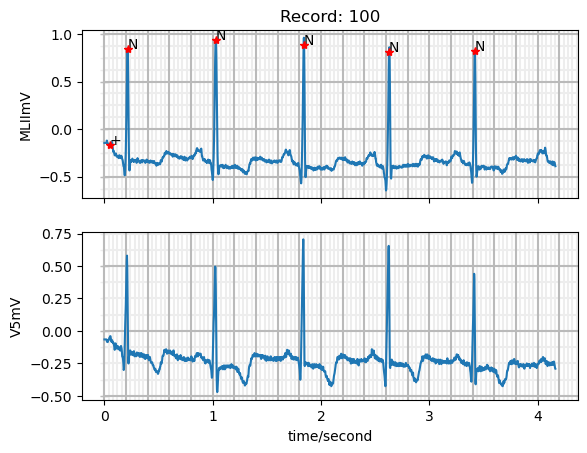

In [6]:
wfdb.plot_wfdb(record=record100,annotation=ann100,plot_sym=True,ecg_grids='all')

In [7]:
dir(record100)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adjust_datetime',
 '_arrange_fields',
 '_auto_signal_file_names',
 'adc',
 'adc_gain',
 'adc_res',
 'adc_zero',
 'base_counter',
 'base_date',
 'base_datetime',
 'base_time',
 'baseline',
 'block_size',
 'byte_offset',
 'calc_adc_params',
 'calc_checksum',
 'check_field',
 'check_field_cohesion',
 'check_read_inputs',
 'check_sig_cohesion',
 'checksum',
 'comments',
 'convert_dtype',
 'counter_freq',
 'd_signal',
 'dac',
 'e_d_signal',
 'e_p_signal',
 'file_name',
 'fmt',
 'fs',
 'get_absolute_time',
 'get_elapsed_time',
 'get_frame_number',
 'get_write_fields',
 'get_write_subset',
 'init_value',
 'n_sig',
 'p_signal',

In [8]:
record100.__dict__

{'record_name': '100',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 1500,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII', 'V5'],
 'p_signal': array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [-0.355, -0.27 ],
        [-0.38 , -0.285],
        [-0.39 , -0.29 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100.dat', '100.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [995, 1011],
 'checksum': [64184, 26661],
 'block_size': [0, 0]}

In [9]:
# Functions to plot records individually
def plot_record(record_id=None,sampto=None):
    try:
        record = wfdb.rdrecord(record_id,sampto=sampto)
        annotation = wfdb.rdann(record_id,'atr',sampto=sampto)
        wfdb.plot_wfdb(record=record,annotation=annotation,plot_sym=True)
        return record
    except Exception as e:
        print(f'Record Id:{record_id} not good')
        print(e)
        
def get_signal_names(dict=None):
    record_name = dict["record_name"]
    print(f'For record {record_name}:\n')
    print(dict["sig_name"])

In [10]:
# Condition to filter annotations file
def filter_anntations_file(file_name=""):
    return file_name.endswith(".atr")

In [11]:
annotation_files = list(filter(filter_anntations_file,files))

In [12]:
record_ids = list(map(lambda x : x.replace(".atr",""), annotation_files))
record_ids.remove('102-0')

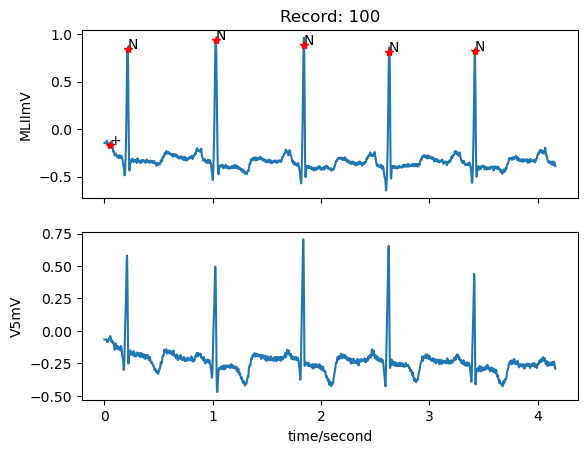

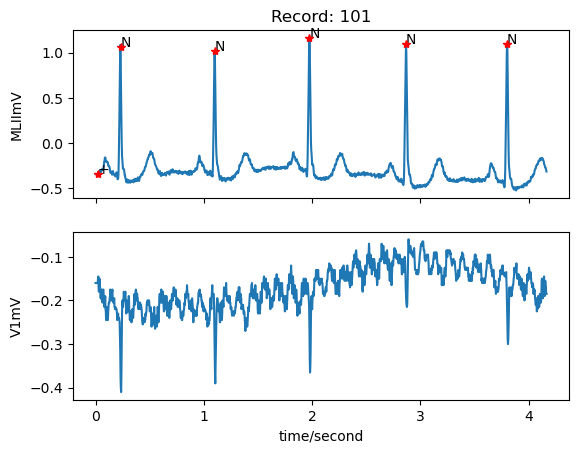

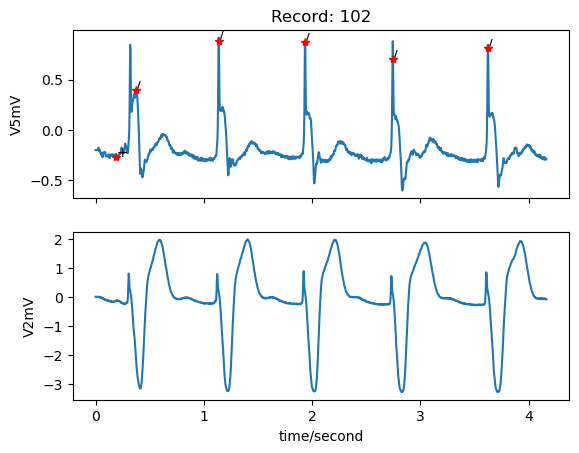

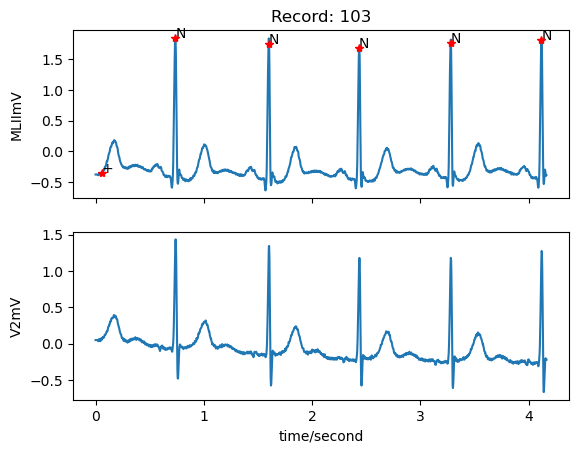

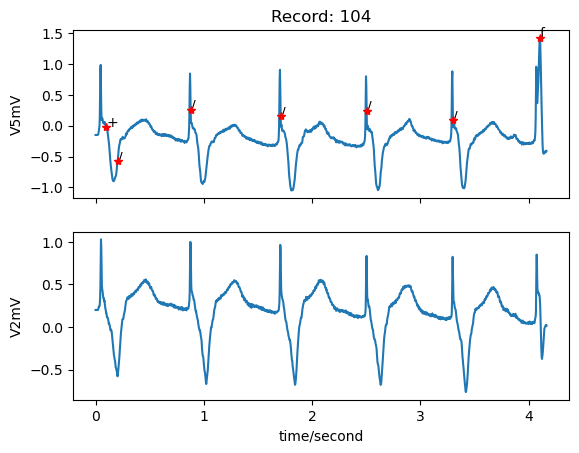

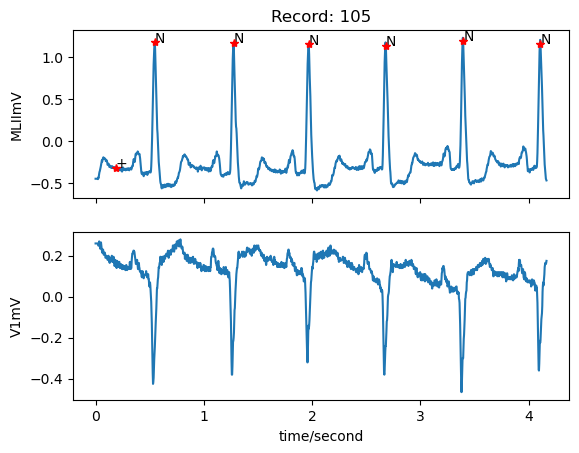

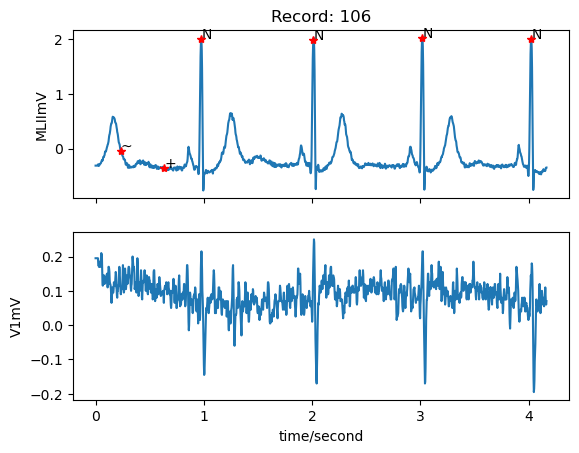

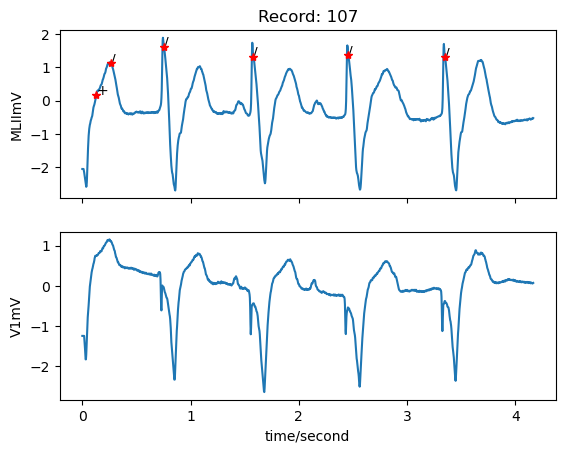

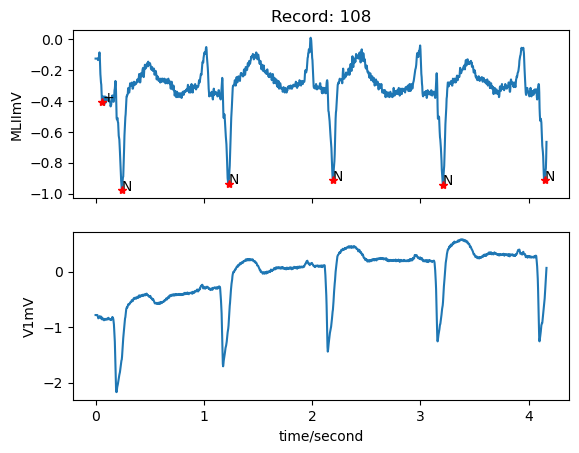

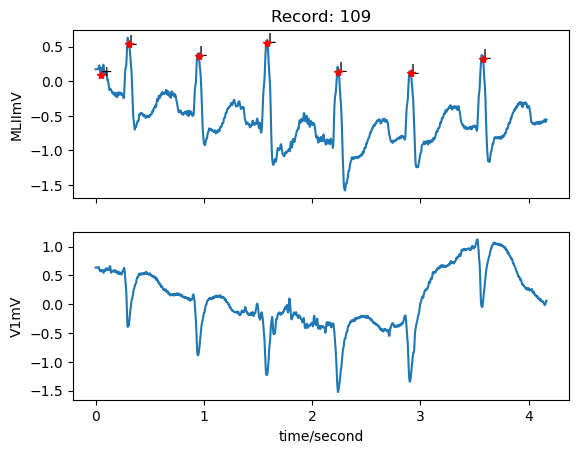

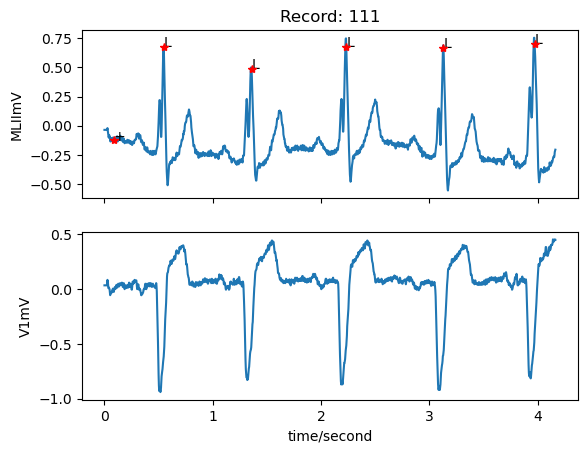

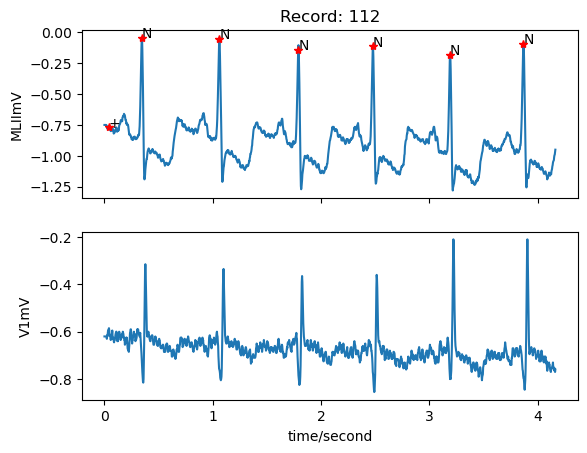

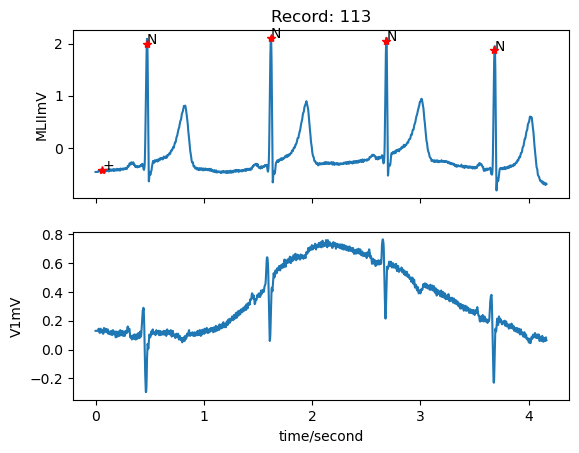

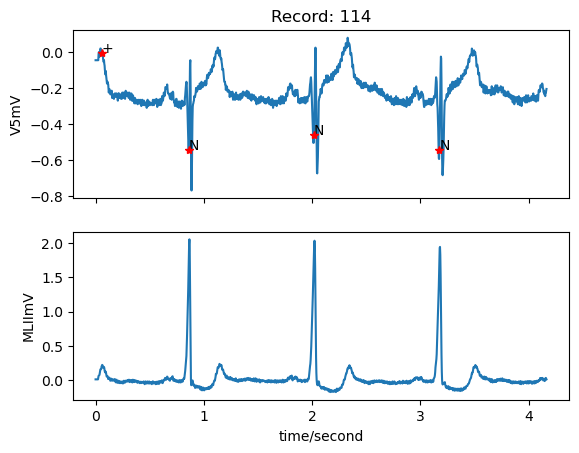

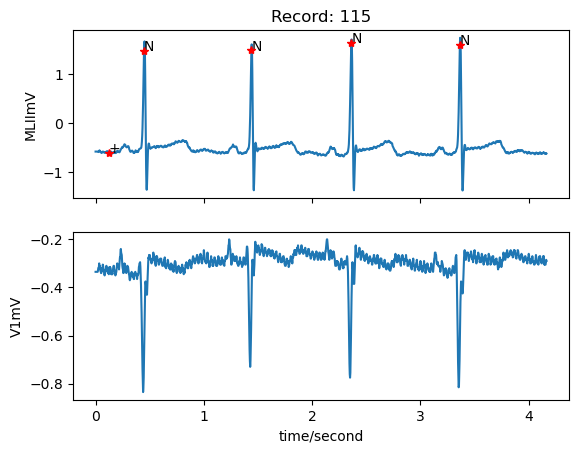

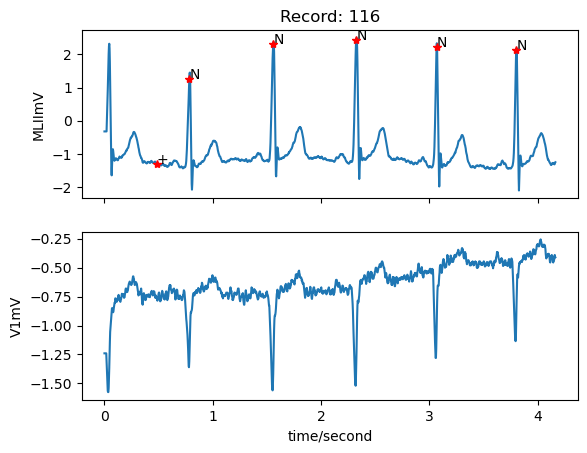

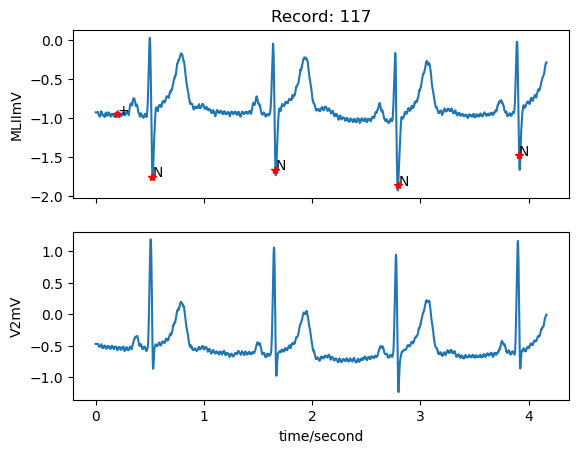

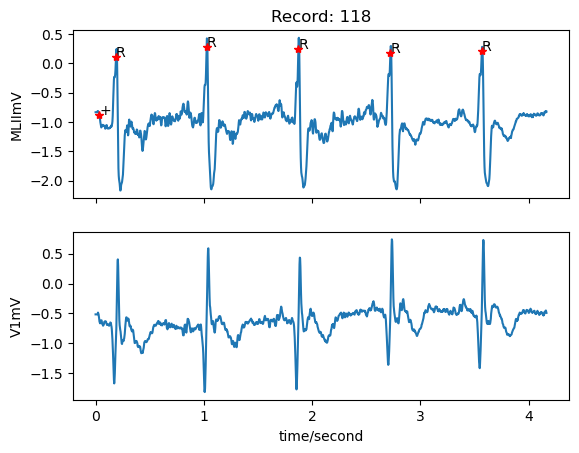

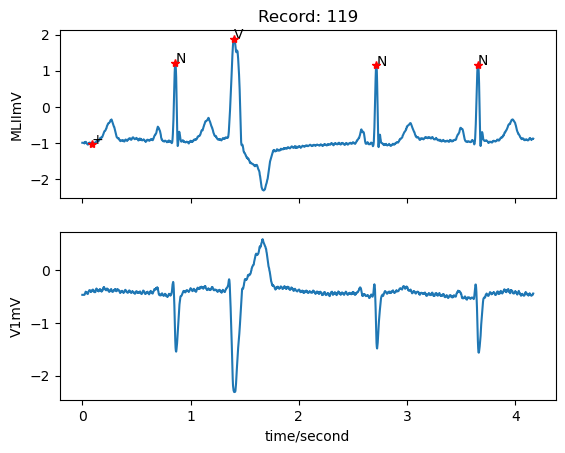

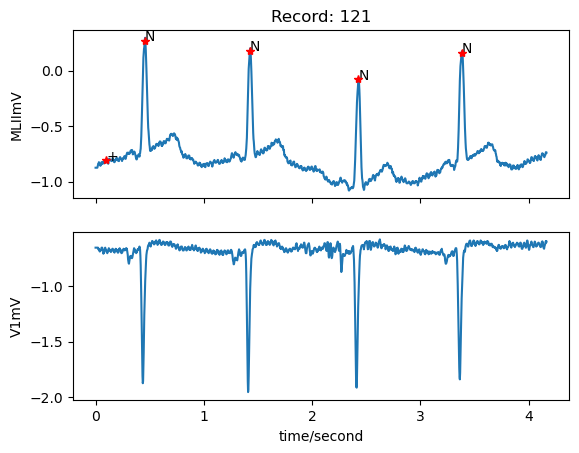

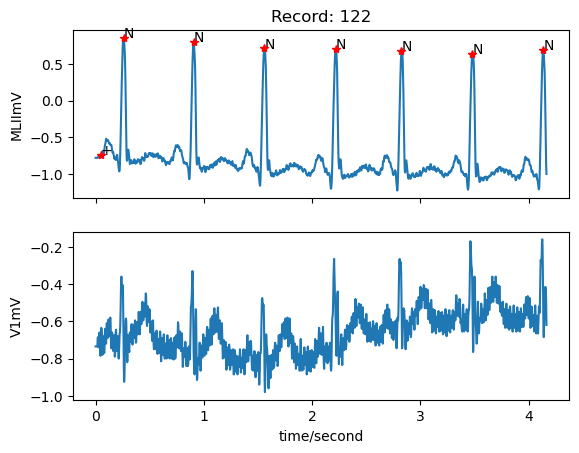

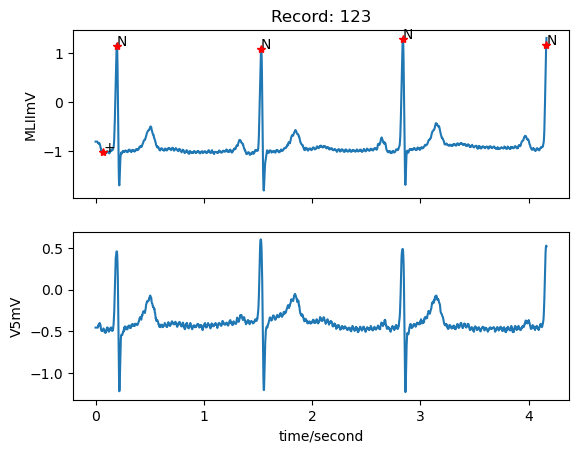

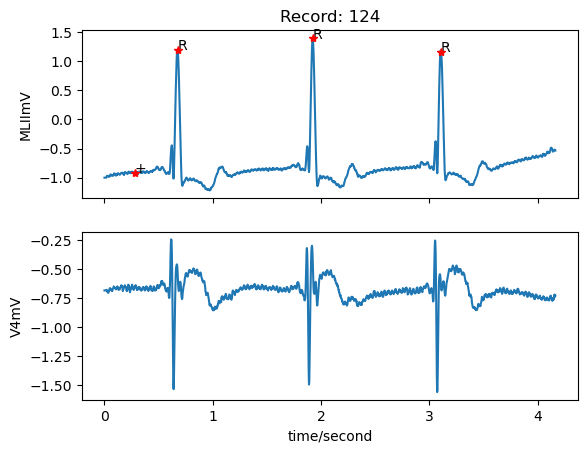

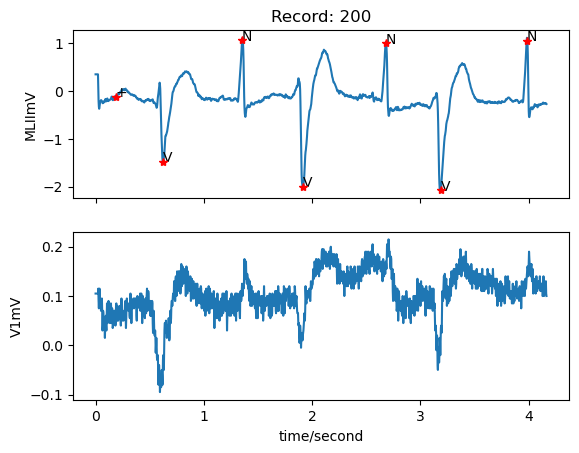

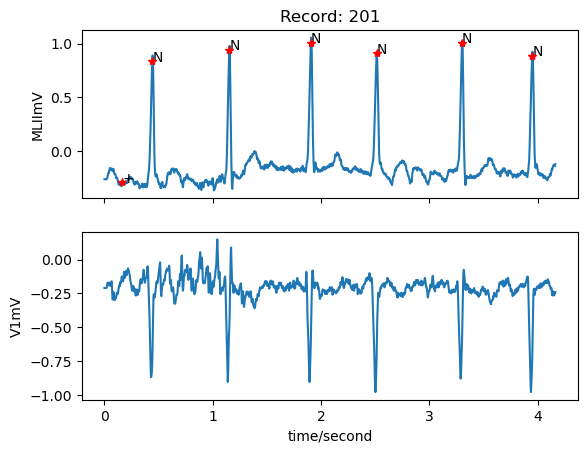

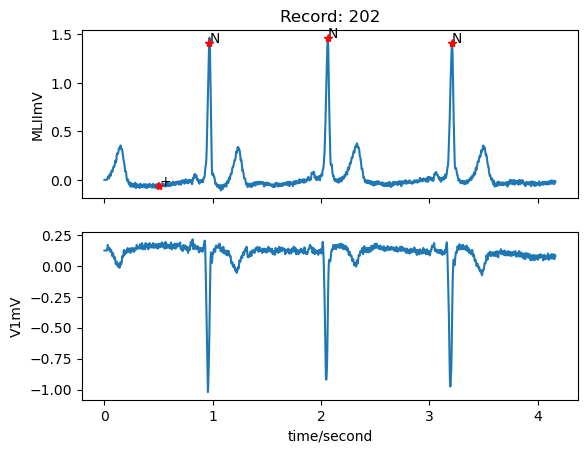

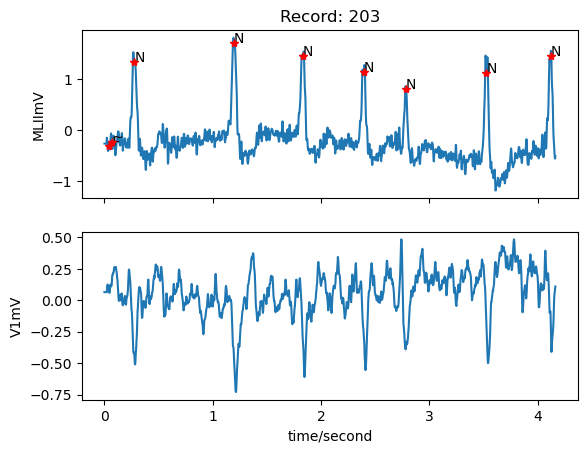

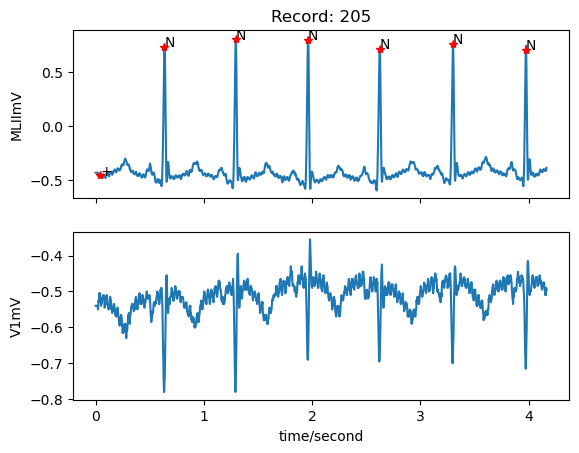

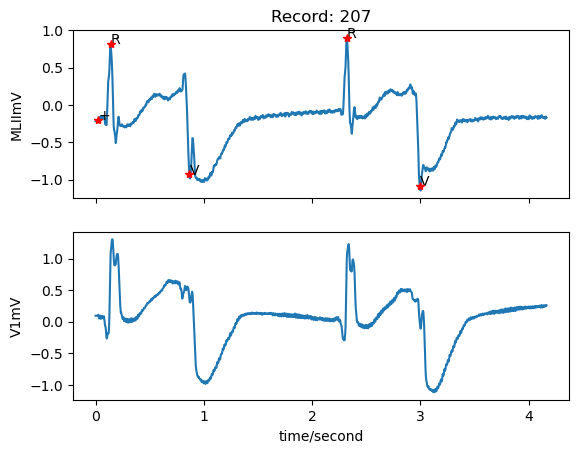

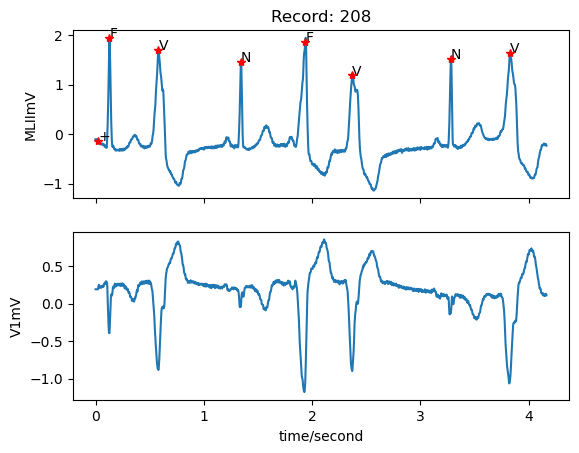

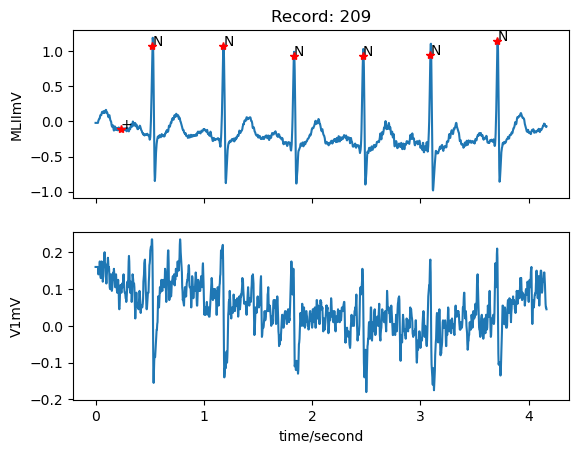

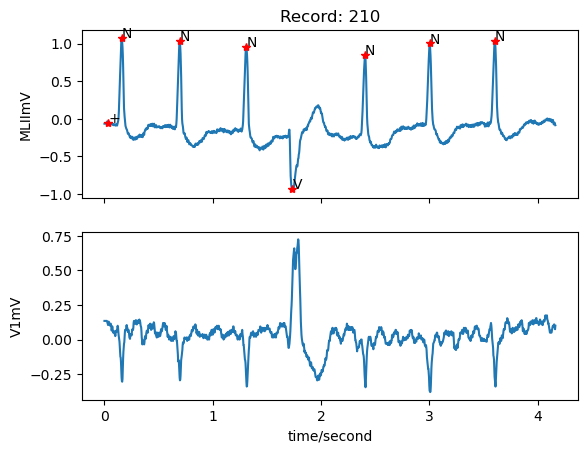

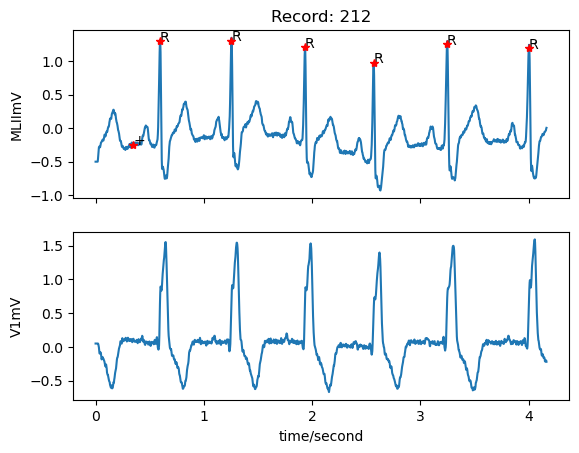

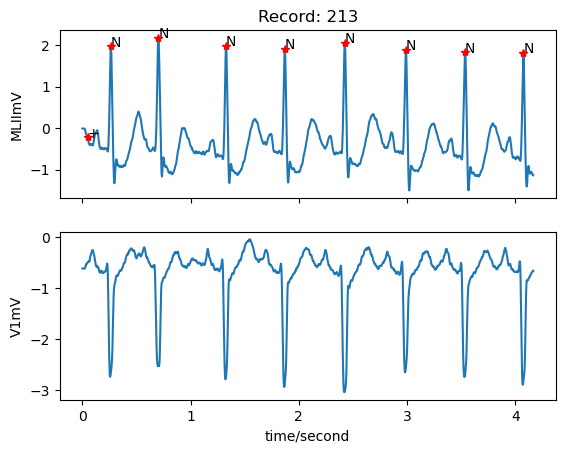

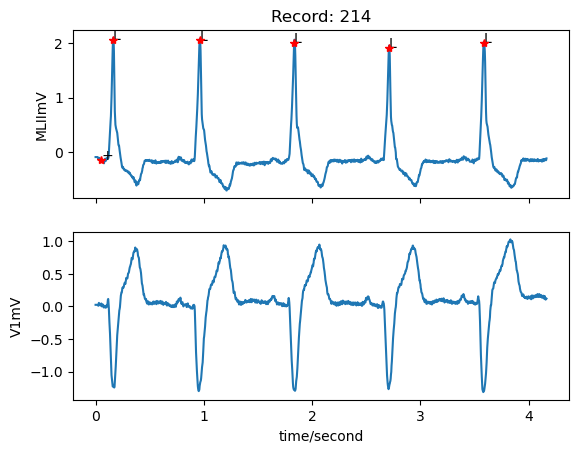

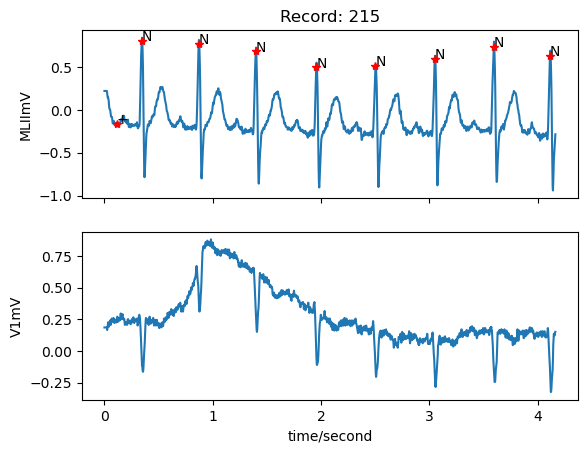

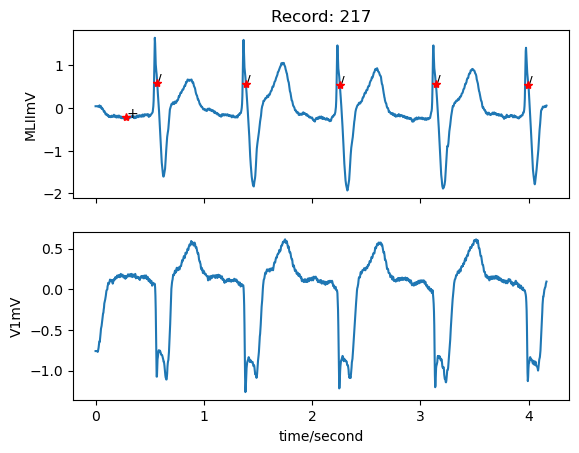

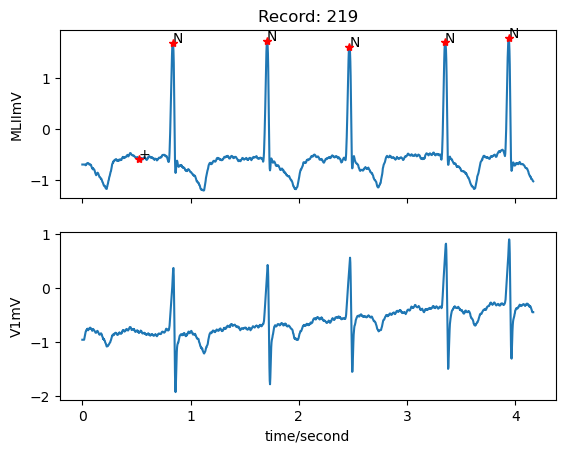

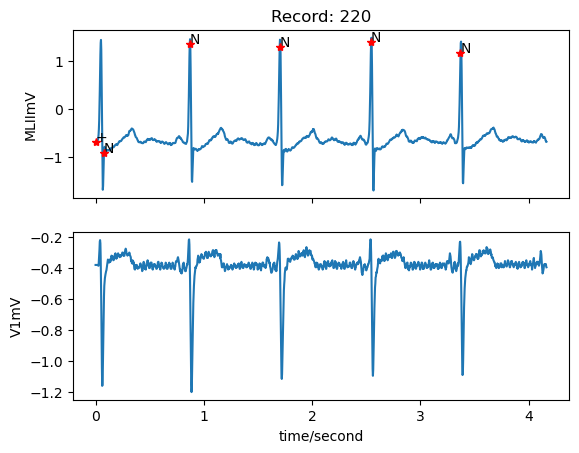

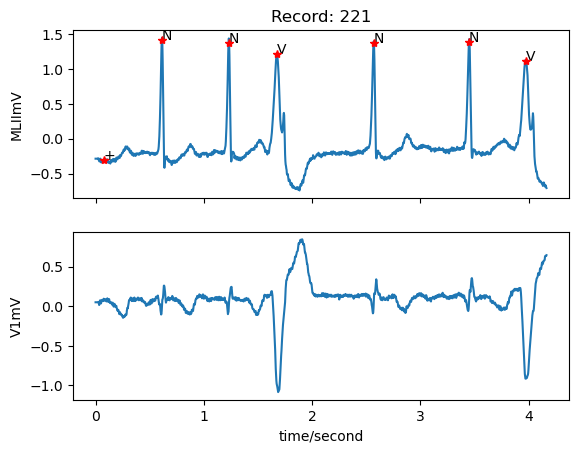

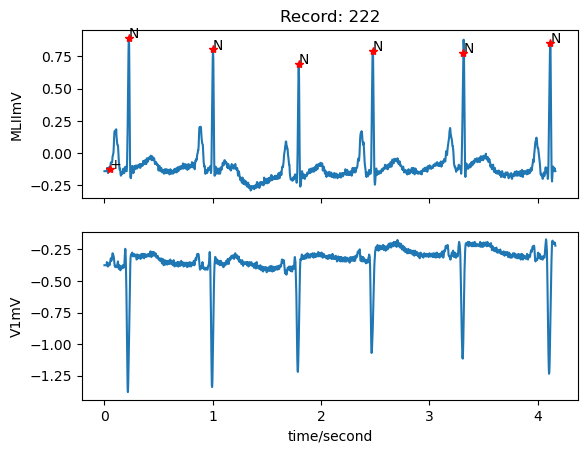

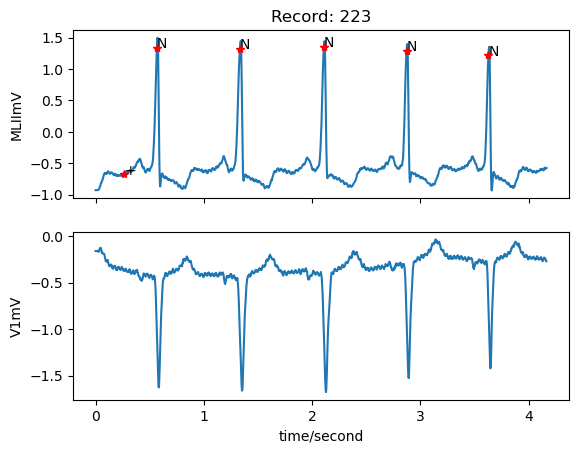

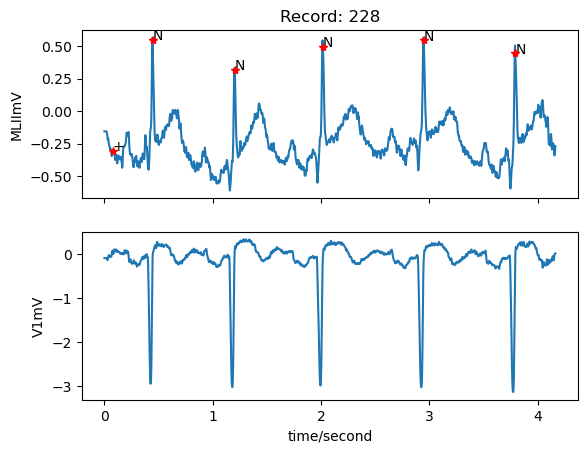

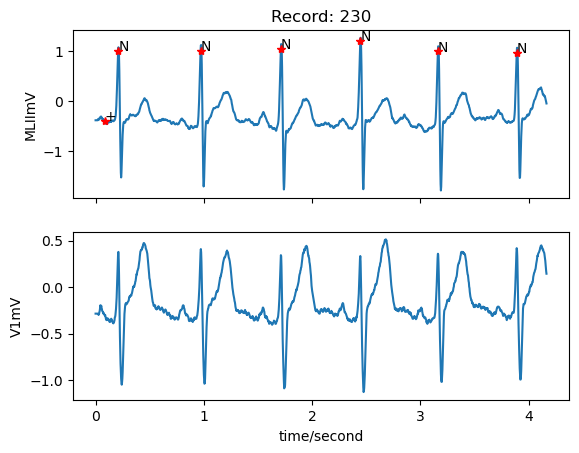

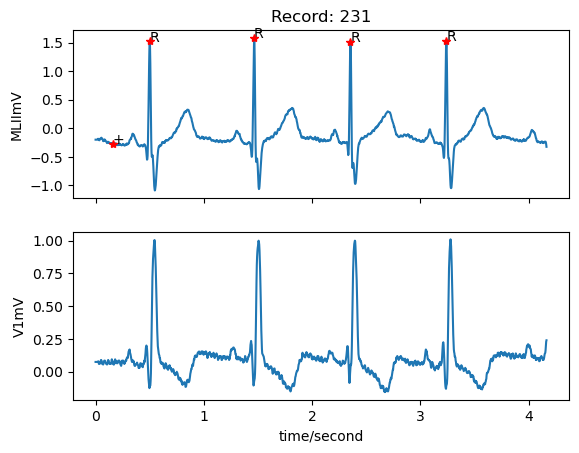

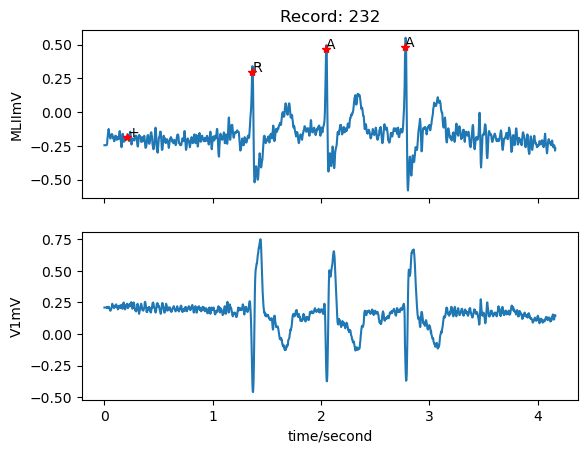

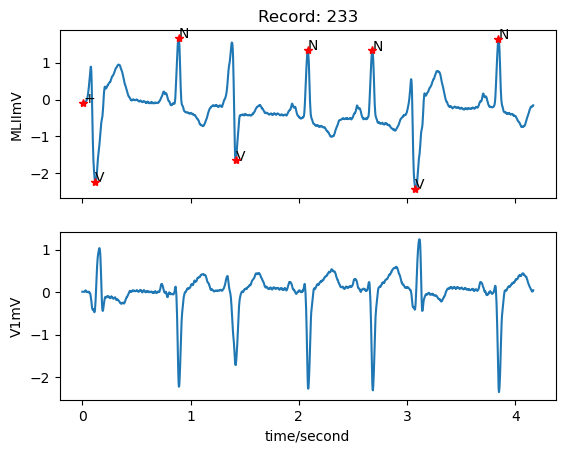

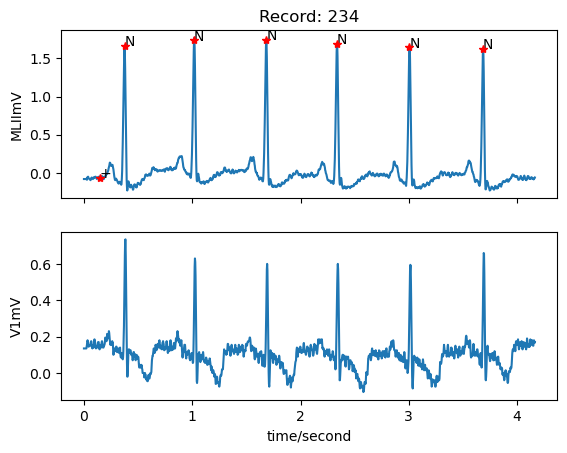

In [13]:
records = []
for record_id in record_ids:
    record_obj = plot_record(record_id,1500)
    records.append(record_obj)

In [14]:
for record in records:
    get_signal_names(record.__dict__)

For record 100:

['MLII', 'V5']
For record 101:

['MLII', 'V1']
For record 102:

['V5', 'V2']
For record 103:

['MLII', 'V2']
For record 104:

['V5', 'V2']
For record 105:

['MLII', 'V1']
For record 106:

['MLII', 'V1']
For record 107:

['MLII', 'V1']
For record 108:

['MLII', 'V1']
For record 109:

['MLII', 'V1']
For record 111:

['MLII', 'V1']
For record 112:

['MLII', 'V1']
For record 113:

['MLII', 'V1']
For record 114:

['V5', 'MLII']
For record 115:

['MLII', 'V1']
For record 116:

['MLII', 'V1']
For record 117:

['MLII', 'V2']
For record 118:

['MLII', 'V1']
For record 119:

['MLII', 'V1']
For record 121:

['MLII', 'V1']
For record 122:

['MLII', 'V1']
For record 123:

['MLII', 'V5']
For record 124:

['MLII', 'V4']
For record 200:

['MLII', 'V1']
For record 201:

['MLII', 'V1']
For record 202:

['MLII', 'V1']
For record 203:

['MLII', 'V1']
For record 205:

['MLII', 'V1']
For record 207:

['MLII', 'V1']
For record 208:

['MLII', 'V1']
For record 209:

['MLII', 'V1']
For record 2